In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

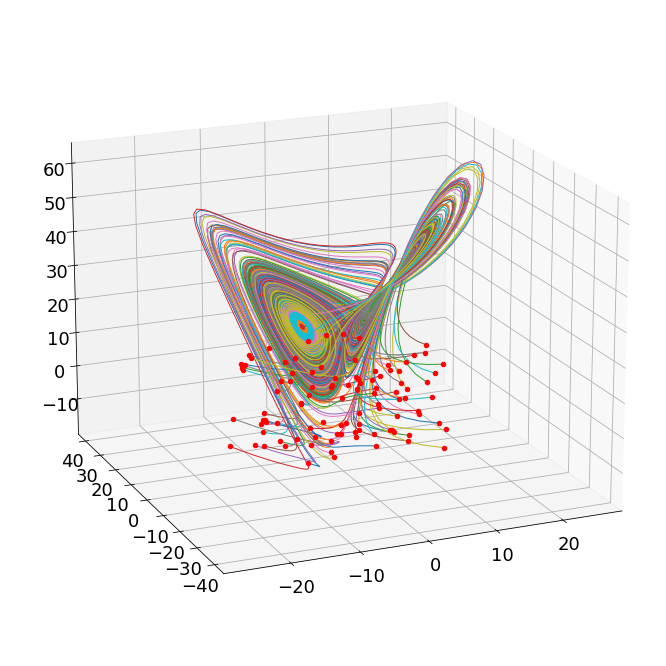

In [21]:

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')

ax.view_init(18, -113)
plt.show()

In [3]:
print(nn_input, nn_output)

tensor([[ 5.8941, -6.4158, -8.1945],
        [ 4.8219, -4.4293, -8.2638],
        [ 4.0229, -2.7980, -8.2030],
        ...,
        [-7.8717, -5.5153, 29.1737],
        [-7.6409, -5.3833, 28.8228],
        [-7.4209, -5.2815, 28.4603]]) tensor([[ 4, -4, -8],
        [ 4, -2, -8],
        [ 3, -1, -8],
        ...,
        [-7, -5, 28],
        [-7, -5, 28],
        [-7, -5, 28]])


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define activation functions
def logsig(x):
    return 1 / (1 + torch.exp(-x))

def radbas(x):
    return torch.exp(-torch.pow(x, 2))

def purelin(x):
    return x

# Define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=3)
        
    def forward(self, x):
        x = logsig(self.fc1(x))
        x = radbas(self.fc2(x))
        x = purelin(self.fc3(x))
        return x

# Create model instance
model = MyModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Convert numpy arrays to PyTorch tensors
nn_input = torch.from_numpy(nn_input).float()
nn_output = torch.from_numpy(nn_output).long()

# Train the model
for epoch in range(30):
    optimizer.zero_grad()
    outputs = model(nn_input)
    loss = criterion(outputs, nn_output)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, loss={loss.item():.4f}")


RuntimeError: Expected floating point type for target with class probabilities, got Long

In [27]:
outputs.shape
nn_output.shape

torch.Size([80000, 3])